# Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# plt.subplot?

<IPython.core.display.Javascript object>


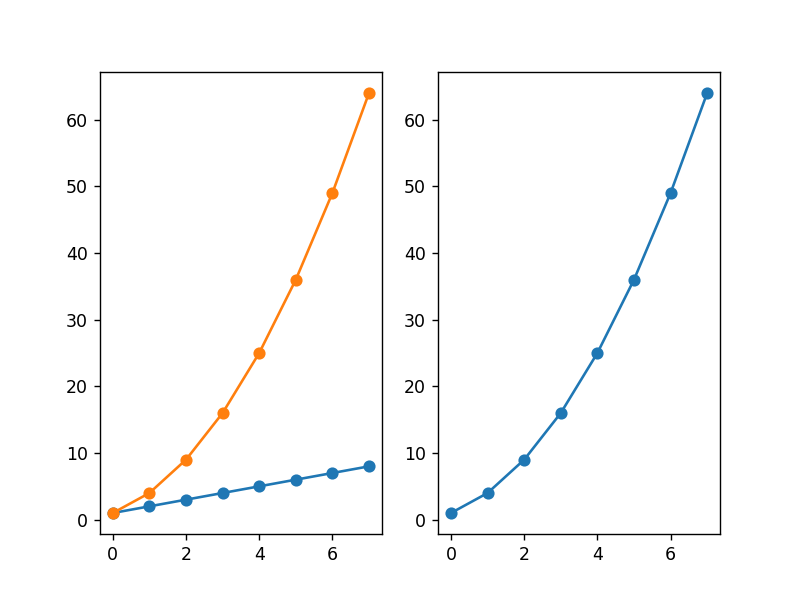

In [2]:
plt.figure()
plt.subplot(1, 2, 1)

linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
 
plt.plot(linear_data, '-o')

In [3]:
exponential_data = linear_data**2

plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [4]:
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-o')

/Users/jerrison/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


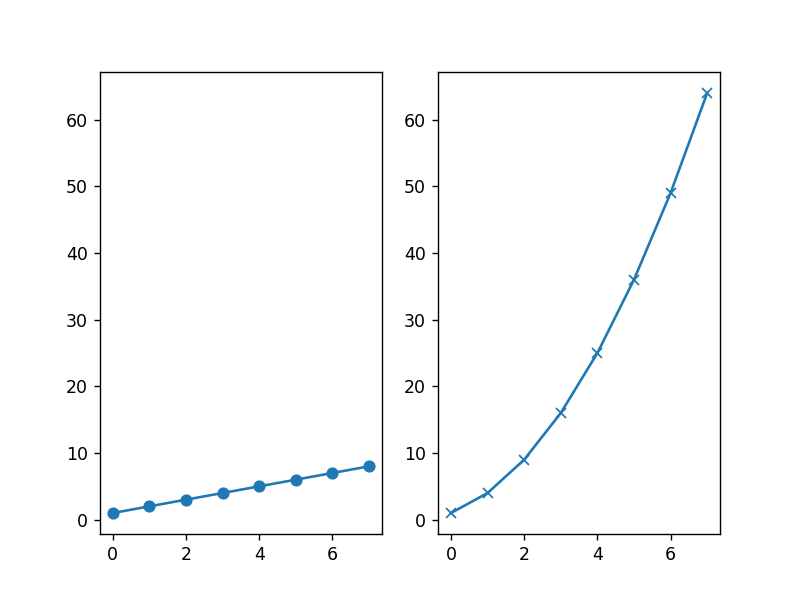

In [5]:
# sharing y axis.  We don't have to store the plot into ax1, ax2 since plt.plot
# invokes gca or get current axis
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


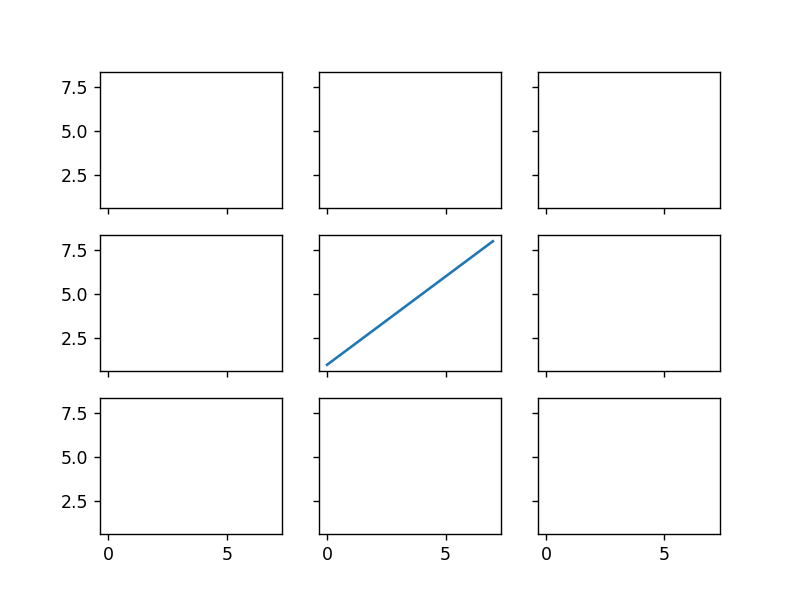

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3
                                                                       ,sharex=True
                                                                       ,sharey=True)
ax5.plot(linear_data, '-')

In [7]:
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [8]:
plt.gcf().canvas.draw() # why are the axes not re drawn?

# Histograms

<IPython.core.display.Javascript object>


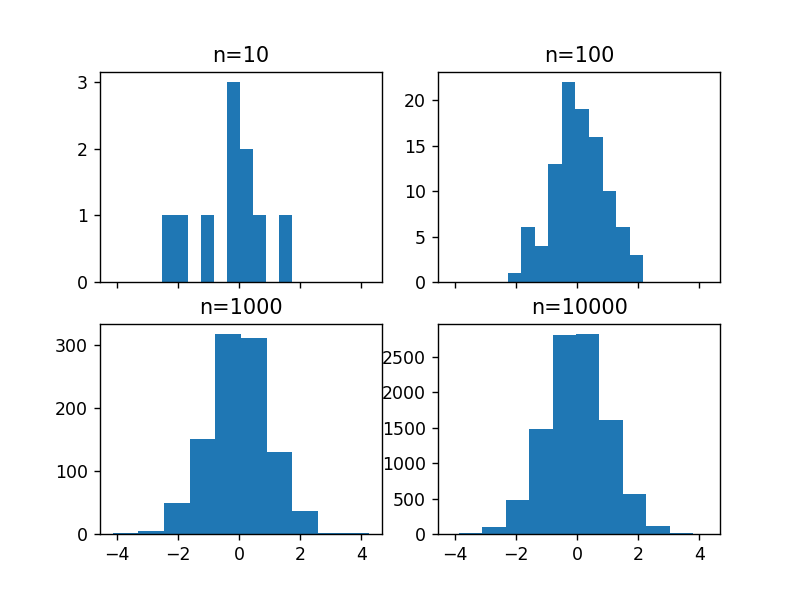

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


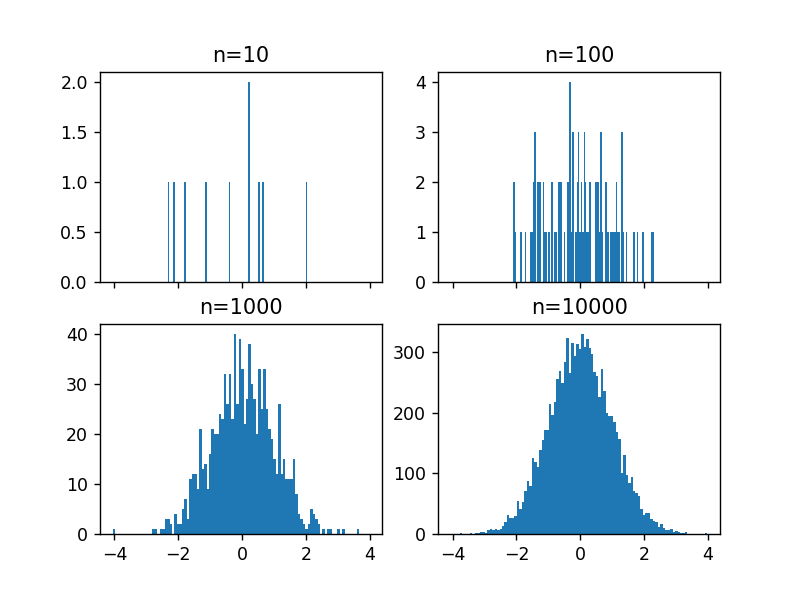

In [10]:
# example with 100 bins
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


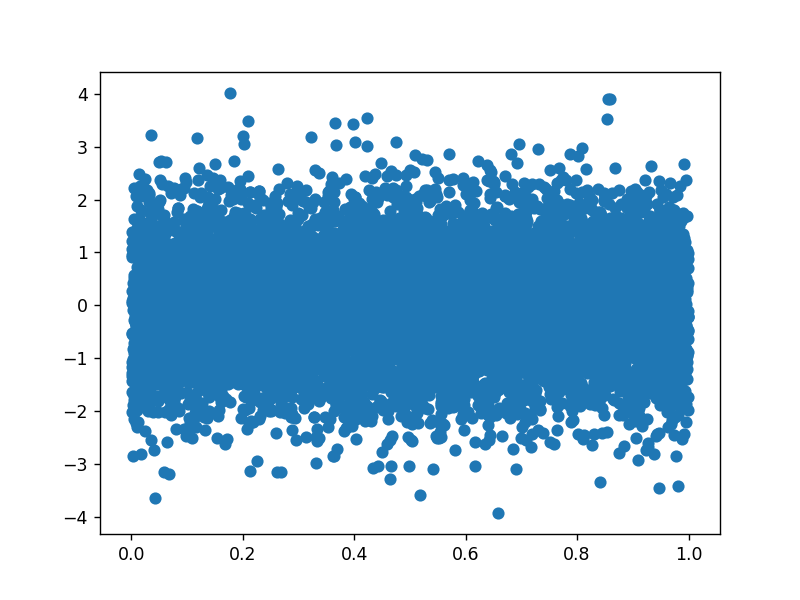

In [11]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X, Y)

<IPython.core.display.Javascript object>


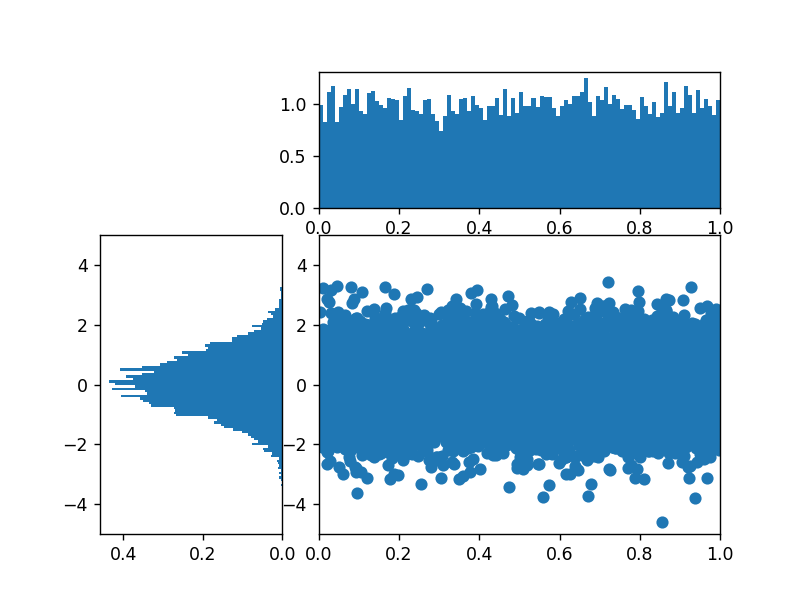

In [14]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:]) # first row, column 2 and right
side_histogram = plt.subplot(gspec[1:, 0]) # second row and below, first column
lower_right = plt.subplot(gspec[1:, 1:]) # lower 4 quadrants of 3x3 grid

In [15]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [16]:
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)

side_histogram.invert_xaxis()

In [17]:
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

# Boxplot and Whisker Plots

In [18]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                  'random': random_sample,
                  'gamma': gamma_sample})

In [20]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.975009,-0.019934,0.500270
std,1.392383,1.008757,0.289785
min,0.028146,-4.236641,0.000160
25%,0.949714,-0.695156,0.249580
50%,1.664023,-0.015644,0.499719
75%,2.648551,0.669925,0.755089
max,12.655383,4.038511,0.999986


<IPython.core.display.Javascript object>


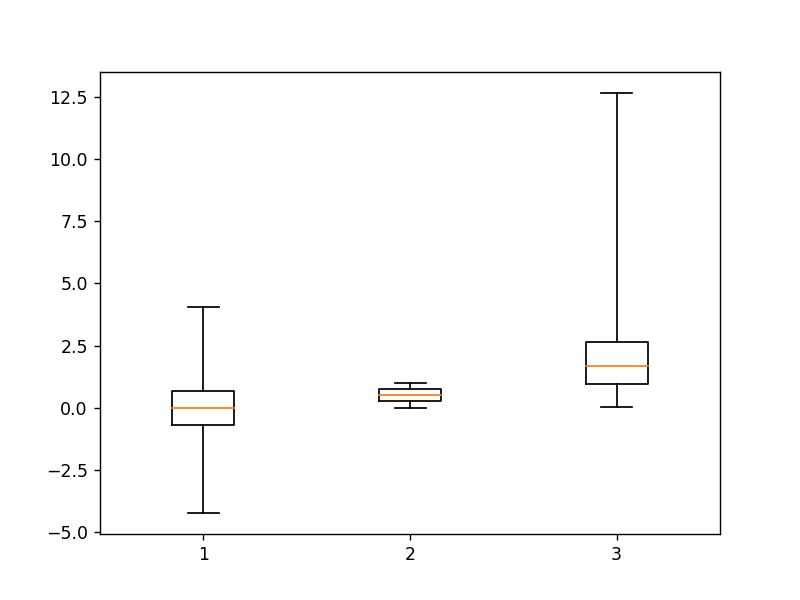

In [22]:
plt.figure()
_ = plt.boxplot(df['normal'], whis='range')

In [25]:
plt.clf()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')
# gamma has a very large range

<IPython.core.display.Javascript object>


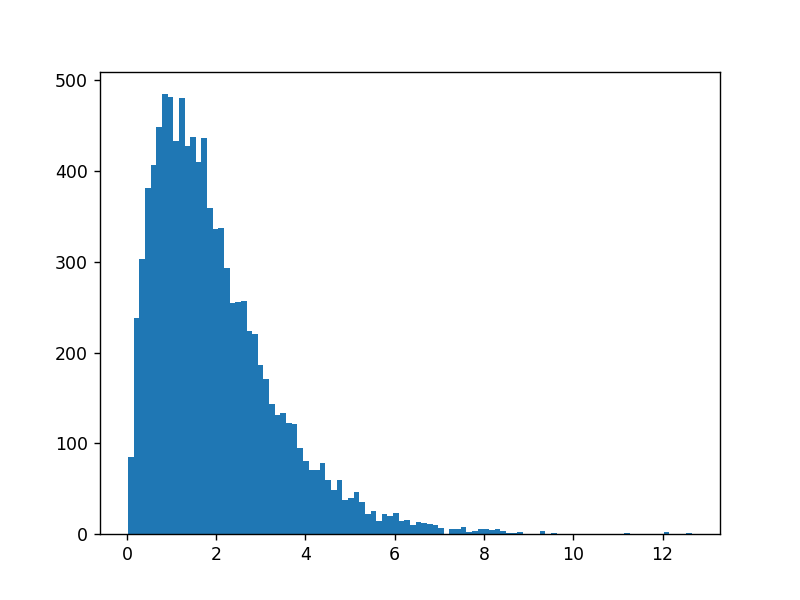

In [26]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


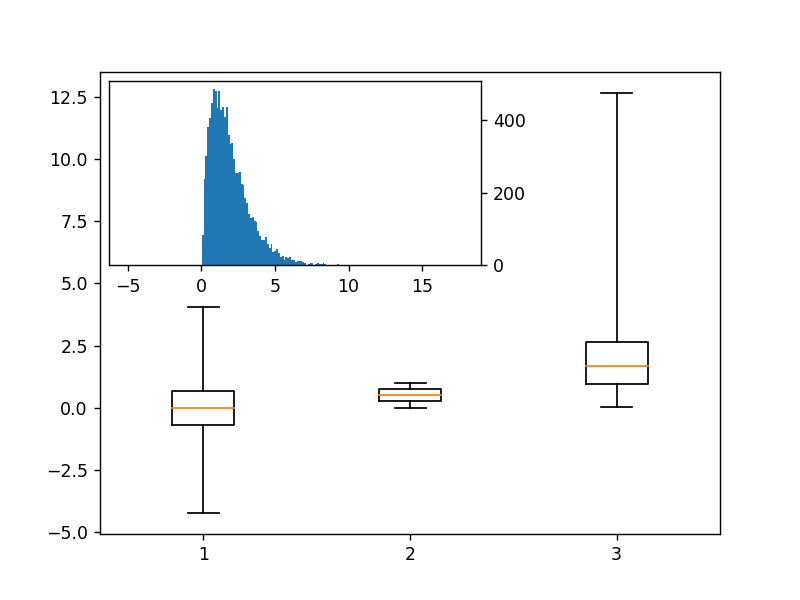

In [31]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [32]:
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


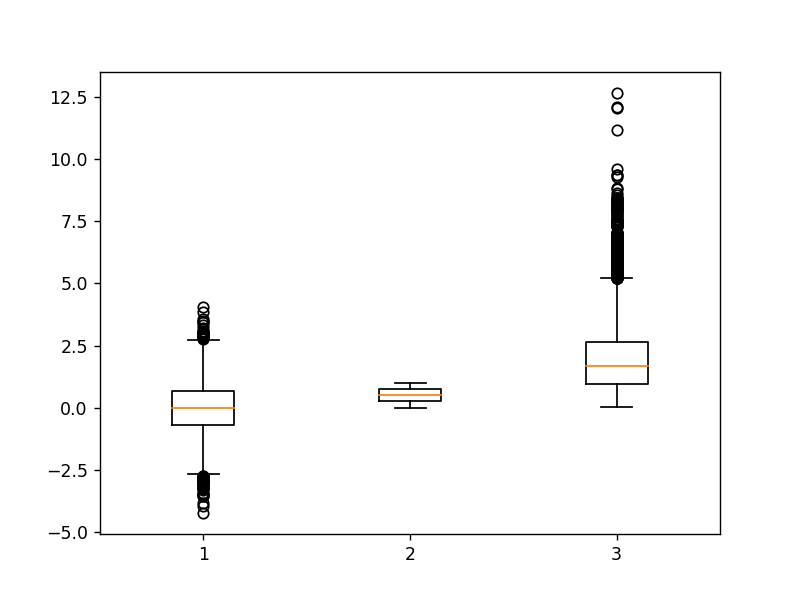

In [34]:
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])

# Heatmaps

<IPython.core.display.Javascript object>


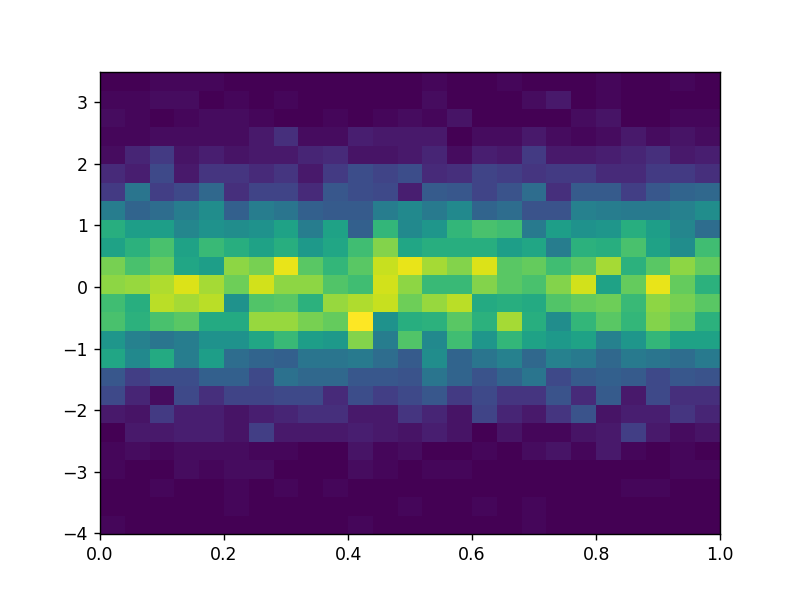

In [35]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


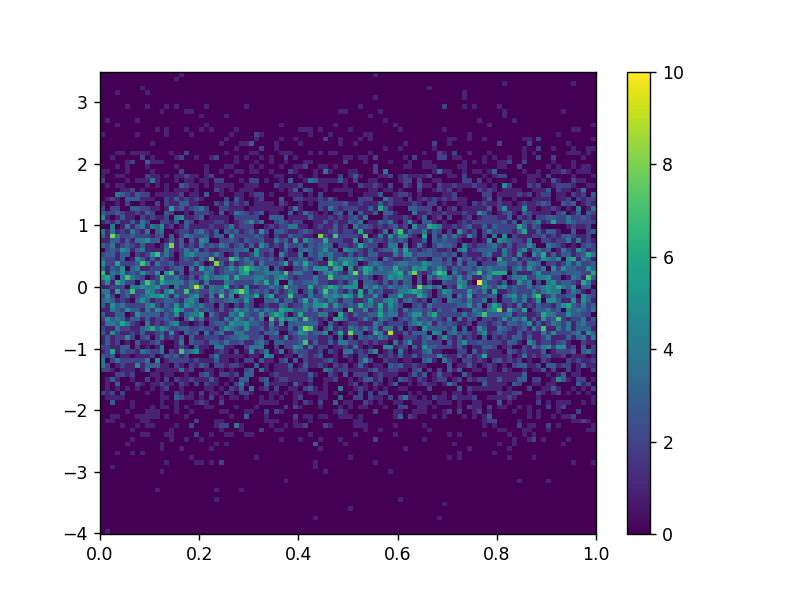

In [37]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)
# ass you add more bins, all points converge to one color since every point is
# a unique value?

In [38]:
plt.colorbar()

# Animations

In [39]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [40]:
def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4, 4, 0, 30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3, 27])

<IPython.core.display.Javascript object>


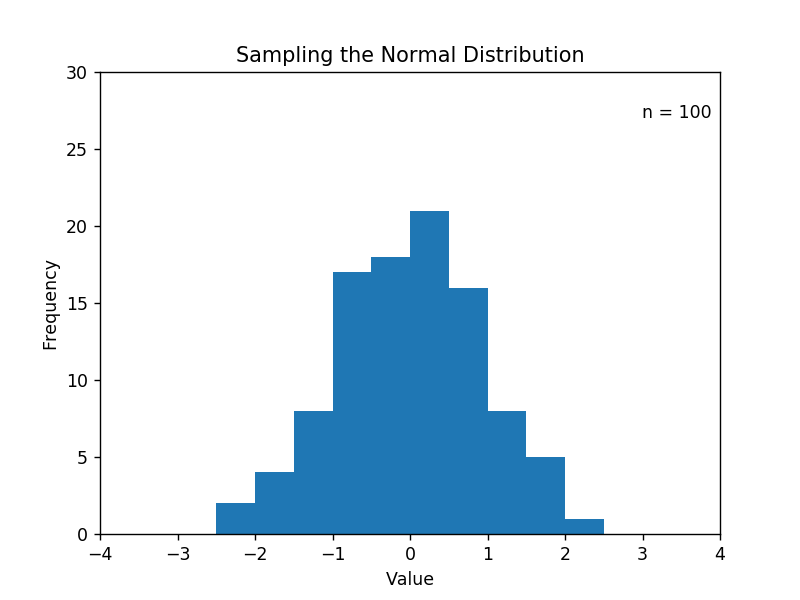

In [41]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)